<a href="https://colab.research.google.com/github/damadorr/ProyectoDistrubuidos/blob/master/Copia_de_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1

Ahora es tu turno de construir un clasificador de imágenes. 

## Ejercicio obligatorio (5 puntos)

A continuación se listan una serie de datasets que están disponibles en Kaggle (algunos de los datasets seleccionados han sido recortados para que puedan entrenarse los modelos en un tiempo razonable). Para cada uno de ellos se os proporciona un enlace al dataset para que podáis descargarlo directamente. El ejercicio que tenéis que realizar obligatoriamente consiste en elegir uno de esos datasets (también podéis elegir otro que vosotros prefiráis) y construir un modelo siguiendo las instrucciones proporcionadas en el notebook de instrucciones. 

- [Blidness dataset](https://www.kaggle.com/c/aptos2019-blindness-detection). Enlace: https://www.dropbox.com/s/cv5dfjagvj8fqk8/blindness.zip?dl=1.
- [Chest xRay dataset](https://www.kaggle.com/nih-chest-xrays/data). Enlace: https://www.dropbox.com/s/q6s4wu7q3yrpwrm/chest_xray.zip?dl=1.
- [Docknet dataset](https://www.kaggle.com/gavinarmstrong/open-sprayer-images). Enlace: https://www.dropbox.com/s/a5pzvpafvgfqvf0/Docknet.zip?dl=1.
- [Tobacco dataset](https://www.kaggle.com/sprytte/tobacco-800-dataset). Enlace: https://www.dropbox.com/s/wy44c0rsv8jogka/tobacco.zip?dl=1. 

## Ejercicios opcionales

En clase hemos visto distintas formas de mejorar los modelos. A continuación se listan los ejercicios adicionales que consisten en incluir dichas mejoras para el dataset que hayas elegido anteriormente. Para que estas mejoras sean tenidas en cuenta han de ser documentadas en el propio notebook, dando una explicación de lo que se está haciendo. 

- *Aumento de datos avanzado* (1 punto). En clase hemos visto que técnicas como MixUp o CutMix pueden ser utilizados para aumentar un dataset de imágenes. Estas técnicas se pueden incluir al entrenar modelos de FastAI mediante [callbacks](https://docs.fast.ai/callback.mixup.html). El ejercicio consiste en incluir estas técnicas para entrenar los modelos que construyas.
- *Label Smoothing* (0.5 puntos). Es conveniente combinar las técnicas anteriores con la técnica de LabelSmoothing. Para ello deberás cambiar la función de pérdida del `Learner` y usar la clase [LabelSmoothingCrossEntropy](https://docs.fast.ai/losses.html#LabelSmoothingCrossEntropy). 
- *Progressive resizing* (0.5 puntos). En clase hemos visto la técnica de progressive resizing que consiste en entrenar el modelo inicialmente con imágenes de un tamaño, y luego continuar entrenándolo con imágenes de tamaño superior. El ejercicio consiste en entrenar tu modelo usando esta técnica. Para ello deberás definir dos `Datablock` distintos cada uno de ellos con el tamaño de imágenes que quieras utilizar, y a partir de ellos construir dos `DataLoader`. Una vez entrenado el modelo con el primer `DataLoader` deberás cambiar el  `DataLoader` del `Learner` y seguir entrenando el modelo. Tienes detallado cómo usar esta técnica en el libro de [FastAI](https://github.com/fastai/fastbook/blob/master/07_sizing_and_tta.ipynb).
- *Aumento en tiempo de test* (0.5 puntos). El ejercicio consiste en utilizar la técnica de aumento en tiempo de test para mejorar el rendimiento del modelo. El uso de esta técnica es sencillo ya que los objetos `Learner` poseen un método llamado `tta`. Tienes detallado cómo usar esta técnica en el libro de [FastAI](https://github.com/fastai/fastbook/blob/master/07_sizing_and_tta.ipynb). Deberás aplicar el aumento en tiempo de test cuando vayas a evaluar el modelo en el conjunto de test. 
- *Discriminative learning rates* (0.5 puntos). El ejercicio consiste en utilizar distintos learning rates para entrenar las distintas componentes de la arquitectura de un modelo. Tienes detallado cómo aplicar esta técnica en el libro de [FastAI](https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb).   
- *Probando distintas arquitecturas* (1 punto). La librería FastAI proporciona distintas arquitecturas como distintas variantes de ResNet o DenseNet. Sin embargo, modelos más actuales como EfficientNet no están incluidos en dicha librería. Para usar dichos modelos podemos emplear la librería [timm](https://github.com/rwightman/pytorch-image-models) y el procedimiento descrito en el proyecto [Walk with fastai](https://walkwithfastai.com/vision.external.timm) para crear modelos con esta librería usando FastAI. El ejercicio consiste en entrenar un modelo usando una arquitectura de EfficientNet (por ejemplo la b3) y otro de ResNeSt (por ejemplo resnest50). 
- *Ensemble de modelos* (1 punto). A partir de varios modelos construye un ensemble de modelos y evalúa su rendimiento en el conjunto de test. 




Incluye a continuación tu código. Al finalizar, recuerda guardar los cambios en GitHub utilizando la opción Archivo -> Guardar una copia en GitHub.

In [1]:
#para empezar cargo la librería FastAI
!pip install fastai --upgrade

     |████████████████████████████████| 194kB 8.0MB/s 
     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 207kB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
#descargo el dataset escogido, en este caso tobacco.
!wget https://www.dropbox.com/s/wy44c0rsv8jogka/tobacco.zip?dl=1 -O tobaccoClassification.zip
!unzip tobaccoClassification.zip

--2021-04-19 20:26:25--  https://www.dropbox.com/s/wy44c0rsv8jogka/tobacco.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/wy44c0rsv8jogka/tobacco.zip [following]
--2021-04-19 20:26:25--  https://www.dropbox.com/s/dl/wy44c0rsv8jogka/tobacco.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbbab5b5ee15b741382ef68f2e6.dl.dropboxusercontent.com/cd/0/get/BM646JHZwOTirb9V9gsWGnK7Nb_ZSMF_zr_LumDVtBp3dcjTQvuejrGH6wQ74uwxMFfyhkMXiYtwm2y_Ju00rQCuHKGynivYVr9ejUBmFdGuUqHvkaJHx_YCbGkvgesN9vQ2XZ-afNppISgNMiLUJbgC/file?dl=1# [following]
--2021-04-19 20:26:26--  https://ucbbab5b5ee15b741382ef68f2e6.dl.dropboxusercontent.com/cd/0/get/BM646JHZwOTirb9V9gsWGnK7Nb_ZSMF_zr_LumDVtBp3dcjTQvuejrGH6wQ74uwxMFfyhkMXiYtwm2y_Ju00rQCuHKG

In [4]:
#exploro el contenido del dataset.
path = Path('Tobacco3482-jpg/')
path.ls()

(#2) [Path('Tobacco3482-jpg/train'),Path('Tobacco3482-jpg/test')]

In [5]:
trainPath = path/'train'
testPath = path/'test'

In [6]:
trainPath.ls()

(#10) [Path('Tobacco3482-jpg/train/Letter'),Path('Tobacco3482-jpg/train/ADVE'),Path('Tobacco3482-jpg/train/Report'),Path('Tobacco3482-jpg/train/Scientific'),Path('Tobacco3482-jpg/train/Note'),Path('Tobacco3482-jpg/train/Form'),Path('Tobacco3482-jpg/train/Email'),Path('Tobacco3482-jpg/train/Memo'),Path('Tobacco3482-jpg/train/Resume'),Path('Tobacco3482-jpg/train/News')]

In [7]:
testPath.ls()

(#10) [Path('Tobacco3482-jpg/test/Letter'),Path('Tobacco3482-jpg/test/ADVE'),Path('Tobacco3482-jpg/test/Report'),Path('Tobacco3482-jpg/test/Scientific'),Path('Tobacco3482-jpg/test/Note'),Path('Tobacco3482-jpg/test/Form'),Path('Tobacco3482-jpg/test/Email'),Path('Tobacco3482-jpg/test/Memo'),Path('Tobacco3482-jpg/test/Resume'),Path('Tobacco3482-jpg/test/News')]

In [8]:
Email = trainPath/'Email'
Email.ls()

(#435) [Path('Tobacco3482-jpg/train/Email/2082042530a.jpg'),Path('Tobacco3482-jpg/train/Email/2078633079.jpg'),Path('Tobacco3482-jpg/train/Email/2077620852b.jpg'),Path('Tobacco3482-jpg/train/Email/2081409793.jpg'),Path('Tobacco3482-jpg/train/Email/2505232397a.jpg'),Path('Tobacco3482-jpg/train/Email/527966261+-6261.jpg'),Path('Tobacco3482-jpg/train/Email/2085776551.jpg'),Path('Tobacco3482-jpg/train/Email/2074602877.jpg'),Path('Tobacco3482-jpg/train/Email/2074589755b_9756.jpg'),Path('Tobacco3482-jpg/train/Email/2078339485c_9486.jpg')...]

El dataset está dividido en train y test y estos a su vez en 10 categorías distintas.

In [38]:
#con DataBlock y DataLoader cargamos el dataset
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [39]:
dls = db.dataloaders(trainPath,bs=128)

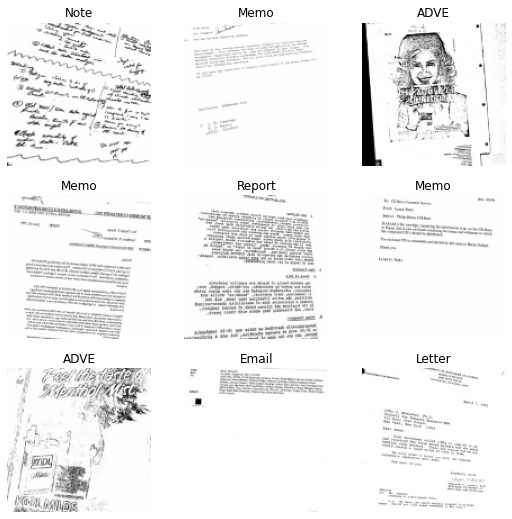

In [11]:
dls.show_batch()

In [12]:
#defino el comportamiento deseado en el proceso de entrenamiento, en este caso quiero obtener las curvas de entrenamiento y validación.
# Defino que pare de entrenar si se observa que no mejora durante 3 épocas.
# Y solicito que guarde el mejor modelo obtenido.
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='tobaccoResnet18')  
]

In [13]:
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.010964781977236271)

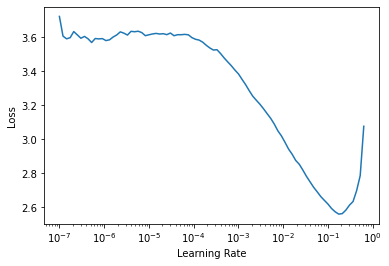

In [14]:
# obtengo el mejor learning rate
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,2.535398,2.866565,0.268199,00:07


Better model found at epoch 0 with valid_loss value: 2.8665647506713867.


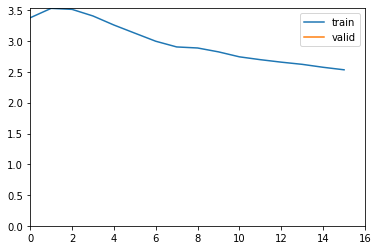

epoch,train_loss,valid_loss,accuracy,time
0,1.631958,2.756192,0.381226,00:07
1,1.414336,1.923889,0.574713,00:07
2,1.236434,0.975189,0.724138,00:07
3,1.079078,0.904747,0.722222,00:07
4,0.979158,0.831139,0.743295,00:07
5,0.868689,0.811269,0.741379,00:07
6,0.786762,0.772316,0.749042,00:07
7,0.713841,0.721215,0.775862,00:07
8,0.665078,0.720789,0.766284,00:07
9,0.621960,0.714340,0.773946,00:07


Better model found at epoch 0 with valid_loss value: 2.7561919689178467.


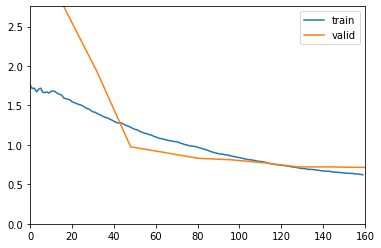

Better model found at epoch 1 with valid_loss value: 1.923888921737671.
Better model found at epoch 2 with valid_loss value: 0.9751890897750854.
Better model found at epoch 3 with valid_loss value: 0.9047472476959229.
Better model found at epoch 4 with valid_loss value: 0.8311386108398438.
Better model found at epoch 5 with valid_loss value: 0.8112685084342957.
Better model found at epoch 6 with valid_loss value: 0.7723162770271301.
Better model found at epoch 7 with valid_loss value: 0.7212151288986206.
Better model found at epoch 8 with valid_loss value: 0.72078937292099.
Better model found at epoch 9 with valid_loss value: 0.7143403887748718.


In [15]:
# aplico fine tune con el lr obtenido anteriormente
learn.fine_tune(10,base_lr=0.009120108559727669)

In [16]:
#muestro que el modelo está en la carpeta models
Path('models').ls()

(#1) [Path('models/tobaccoResnet18.pth')]

In [17]:
# exporto el modelo por si quisiera usarlo más adelante
learn.export()

In [18]:
#comprobamos si se ha exportado
Path().ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
# valido el modelo
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [20]:
learn.dls = dlsTest

In [21]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.36165326833724976.


(#2) [3.02150559425354,0.36165326833724976]

obtenemos un 35% de accuracy

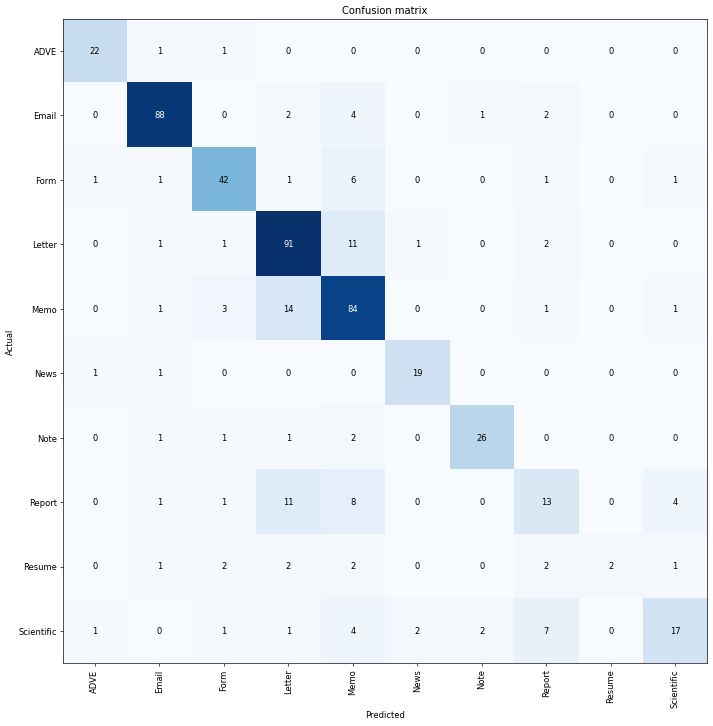

In [22]:
learn.dls=dls
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

veo en la diagonal varios 0s, lo que indica que no es capaz de clasificar correctamente ningún "Memo" ni ningún "Report". Además la matriz de confusión está bastante lejos de ser diagonal, por lo que no es capaz de predecir nada correctamente.

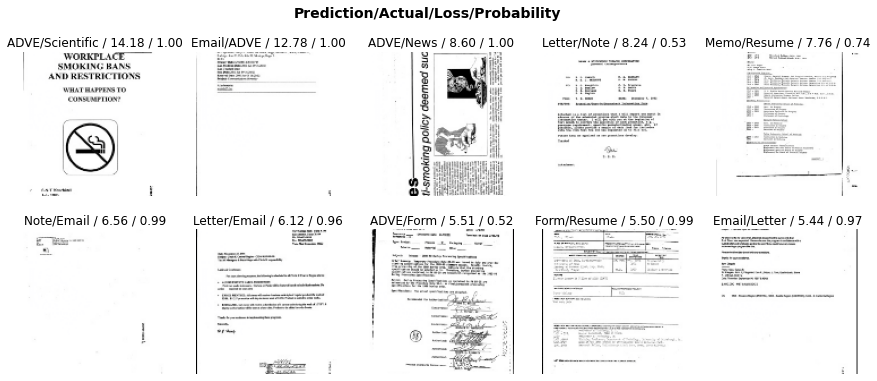

In [23]:
interp.plot_top_losses(10,nrows=2)

In [24]:
# voy a usar el modelo para clasificar una imagen
learn_inf = load_learner('export.pkl')

In [28]:
learn_inf.predict('Tobacco3482-jpg/test/Email/2064213021d.jpg')

('Email',
 tensor(1),
 tensor([9.5796e-05, 9.9743e-01, 1.3216e-04, 1.2864e-04, 5.8304e-04, 9.0271e-05,
         3.1803e-04, 1.4942e-04, 8.3284e-04, 2.3726e-04]))

En este caso ha conseguido clasificar correctamente la imagen, un Email.

## Opcionales 1 y 2:

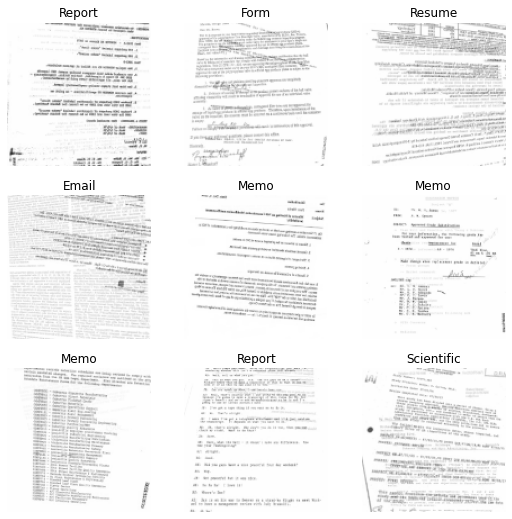

In [30]:
mixup = MixUp(1.)
lmce = LabelSmoothingCrossEntropy()
with Learner(dls, nn.Linear(3,4), loss_func=lmce, cbs=mixup) as learn:
    learn.epoch,learn.training = 0,True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_,axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(mixup.x,mixup.y), ctxs=axs.flatten())

## Opcional 3:

In [31]:

def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(path, bs=bs)

In [32]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='tobaccoResnet18')  
]

epoch,train_loss,valid_loss,accuracy,time
0,2.662973,1.657591,0.485632,00:20
1,2.015068,1.189298,0.647988,00:20
2,1.667412,1.095389,0.647988,00:20
3,1.476655,1.073296,0.656609,00:20


Better model found at epoch 0 with valid_loss value: 1.657590627670288.


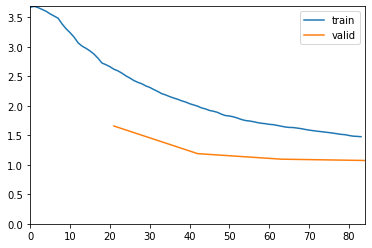

Better model found at epoch 1 with valid_loss value: 1.1892980337142944.
Better model found at epoch 2 with valid_loss value: 1.0953887701034546.
Better model found at epoch 3 with valid_loss value: 1.0732959508895874.


In [35]:
dls = get_dls(128, 128)
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.382587,0.960659,0.666667,00:22


Better model found at epoch 0 with valid_loss value: 0.960658609867096.


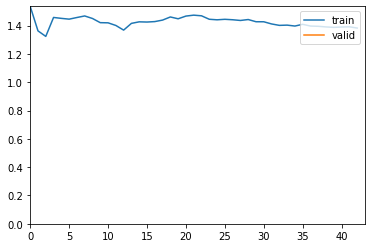

epoch,train_loss,valid_loss,accuracy,time
0,1.122467,0.840282,0.719828,00:22
1,1.020270,0.824257,0.718391,00:21
2,0.929097,0.742467,0.739943,00:22
3,0.852733,0.700920,0.751437,00:21
4,0.789310,0.698663,0.754310,00:22


Better model found at epoch 0 with valid_loss value: 0.8402823805809021.


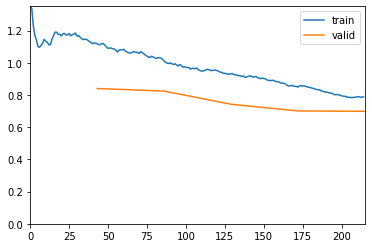

Better model found at epoch 1 with valid_loss value: 0.8242568373680115.
Better model found at epoch 2 with valid_loss value: 0.7424668669700623.
Better model found at epoch 3 with valid_loss value: 0.7009203433990479.
Better model found at epoch 4 with valid_loss value: 0.6986629366874695.


In [36]:
learn.dls = get_dls(64, 224)
learn.fine_tune(5, 1e-3)

## Opcional 4:

In [37]:
preds,targs = learn.tta()
accuracy(preds, targs).item()

0.8002873659133911

## Opcional 5:

epoch,train_loss,valid_loss,accuracy,time
0,2.664596,1.637600,0.482759,00:07
1,2.122077,1.730600,0.513410,00:07
2,1.861121,1.318729,0.605364,00:07


Better model found at epoch 0 with valid_loss value: 1.6375999450683594.


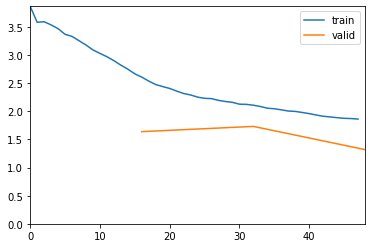

Better model found at epoch 2 with valid_loss value: 1.3187285661697388.


epoch,train_loss,valid_loss,accuracy,time
0,1.508385,1.152890,0.632184,00:07
1,1.472217,1.101912,0.624521,00:07
2,1.439635,1.065344,0.624521,00:07
3,1.380005,1.054110,0.632184,00:07
4,1.354125,1.032687,0.628352,00:07
5,1.343039,1.021533,0.639847,00:07
6,1.314447,1.005375,0.632184,00:07
7,1.291207,0.992648,0.634100,00:07
8,1.281899,0.993221,0.643678,00:07
9,1.261238,0.985306,0.645594,00:07


Better model found at epoch 0 with valid_loss value: 1.1528899669647217.


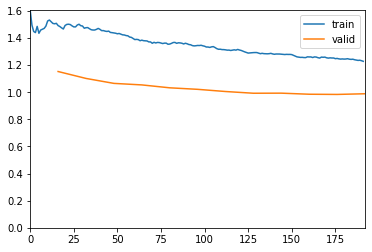

Better model found at epoch 1 with valid_loss value: 1.1019116640090942.
Better model found at epoch 2 with valid_loss value: 1.0653444528579712.
Better model found at epoch 3 with valid_loss value: 1.0541104078292847.
Better model found at epoch 4 with valid_loss value: 1.0326873064041138.
Better model found at epoch 5 with valid_loss value: 1.0215333700180054.
Better model found at epoch 6 with valid_loss value: 1.0053750276565552.
Better model found at epoch 7 with valid_loss value: 0.9926483035087585.
Better model found at epoch 9 with valid_loss value: 0.9853056073188782.
Better model found at epoch 10 with valid_loss value: 0.9838680028915405.


In [40]:
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

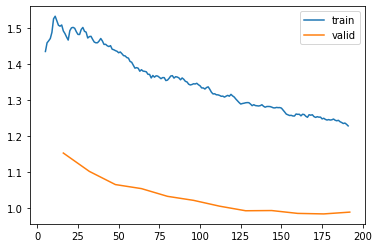

In [41]:
learn.recorder.plot_loss()